In [40]:
%pip install -r requirements.txt

You should consider upgrading via the '/Users/cody/venvs/mldrift/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import lightgbm as lgbm
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [42]:
plt.style.use("dark_background")

In [43]:
t = pd.date_range(start="2000-01-01", end=datetime.today(), freq="H")
t

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2022-03-14 05:00:00', '2022-03-14 06:00:00',
               '2022-03-14 07:00:00', '2022-03-14 08:00:00',
               '2022-03-14 09:00:00', '2022-03-14 10:00:00',
               '2022-03-14 11:00:00', '2022-03-14 12:00:00',
               '2022-03-14 13:00:00', '2022-03-14 14:00:00'],
              dtype='datetime64[ns]', length=194607, freq='H')

In [44]:
x = pd.to_numeric(t)
x

Int64Index([ 946684800000000000,  946688400000000000,  946692000000000000,
             946695600000000000,  946699200000000000,  946702800000000000,
             946706400000000000,  946710000000000000,  946713600000000000,
             946717200000000000,
            ...
            1647234000000000000, 1647237600000000000, 1647241200000000000,
            1647244800000000000, 1647248400000000000, 1647252000000000000,
            1647255600000000000, 1647259200000000000, 1647262800000000000,
            1647266400000000000],
           dtype='int64', length=194607)

In [45]:
f = 1 / (365 * 24 * 60 * 60 * 30 * 10**9) * 10  # f ~= 1/year
f

1.0569930661254861e-17

In [46]:
y = np.sin(2 * np.pi * f * x)
y

Float64Index([ 0.04015568188006707,  0.04039457409051977, 0.040633463991929325,
              0.040872351570640265, 0.041111236812997255, 0.041350119705345086,
               0.04158900023402868,   0.0418278783854002,  0.04206675414579064,
               0.04230562750155244,
              ...
                 0.529716492493675,   0.5295136904743662,   0.5293108581868845,
                0.5291079956428242,   0.5289051028537815,    0.528702179831354,
                0.5284992265871414,   0.5282962431327449,   0.5280932294797676,
                0.5278901856398139],
             dtype='float64', length=194607)

In [47]:
data = {
    "f1": np.sin(2 * np.pi * f * x),  # *(x[-1]-x)*f
    "f2": np.random.random() * 2 * np.cos(2 * np.pi * f * x)
    + 0.2 * np.random.random(x.shape),
    "f3": np.sinc(2 * np.pi * f * x),
    "f4": 1 + 0.01 * np.random.random(x.shape),
    "f5": 1 + 0.2 * np.random.random(x.shape),
    # "f6": x*f+2*np.random.random(x.shape),
    # "f7": (x[-1]-x)*f+2*np.random.random(x.shape)
}

df = pd.DataFrame(data, index=t)

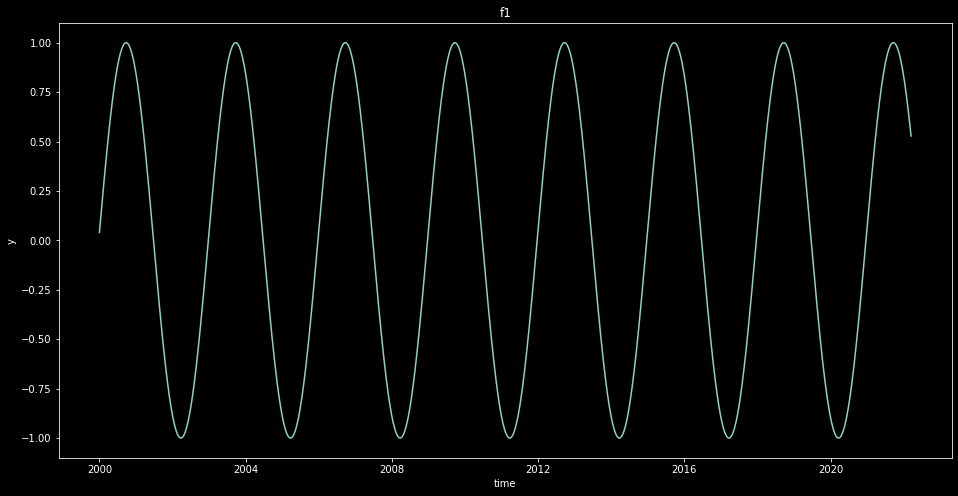

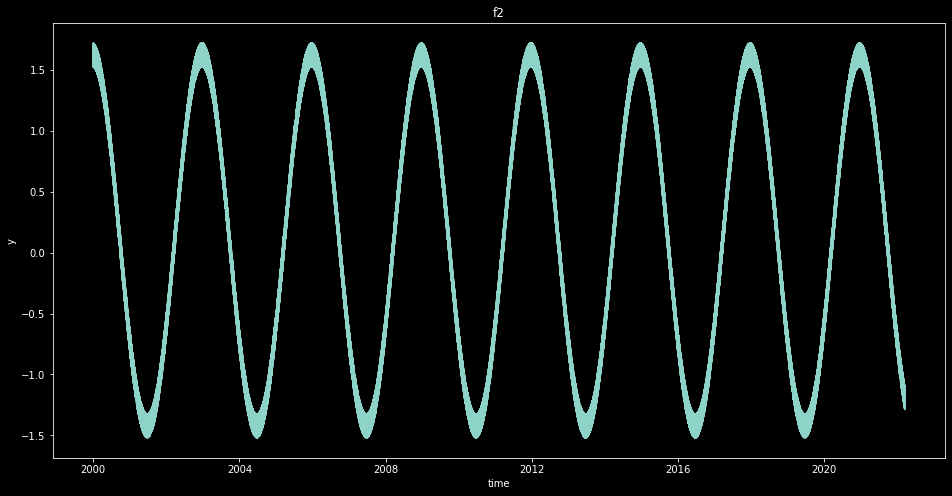

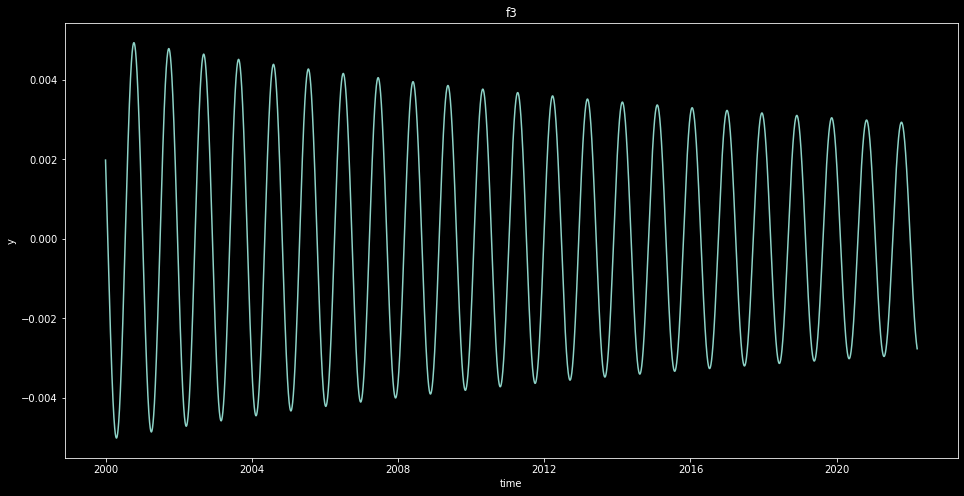

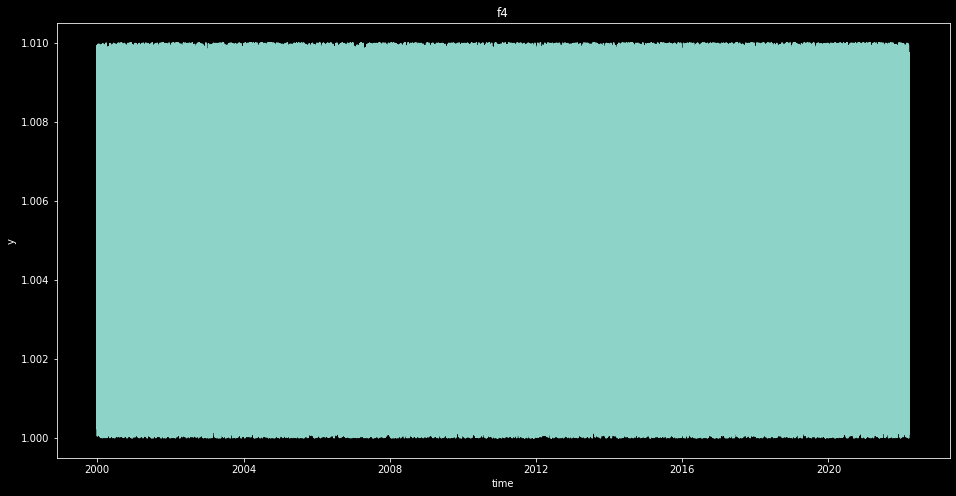

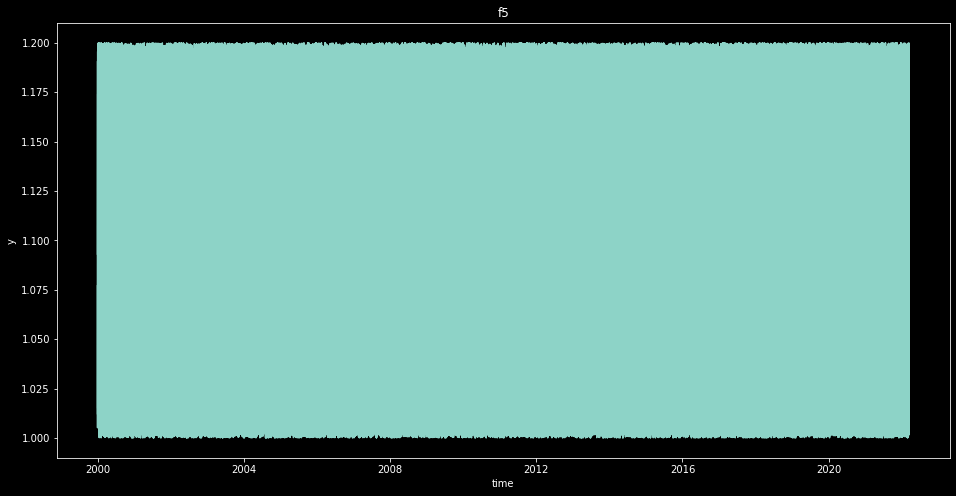

In [48]:
for i in range(len(data)):

    fig, ax = plt.subplots(figsize=(16, 8))

    ax.set_xlabel("time")
    ax.set_ylabel("y")
    ax.set_title(f"f{i+1}")

    plt.plot(t, df[f"f{i+1}"])

In [49]:
%pip install --upgrade mldrift

You should consider upgrading via the '/Users/cody/venvs/mldrift/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
# from src.tabular.lightgbm_diff import DataDiff
from mldrift.tabular.lightgbm_diff import DataDiff

baseline = df["2000-01-01":"2000-02-01"]
test = df["2000-02-01":"2000-03-01"]

diff = DataDiff(baseline, test)

metrics = diff.run()
metrics

[{"name": "datadrift_coefficient", "value": 0.9569657727718198, "schema_version": "1.0", "extended_properties": {"metric_type": "dataset", "mcc_train_for_debug": 0.9785886984312058, "mcc_test_for_debug": 0.9569657727718198, "mcc_all_for_debug": 0.9677167462524416}},
 {"name": "datadrift_contribution", "value": 546.0, "schema_version": "1.0", "extended_properties": {"metric_type": "column", "column_name": "f1"}},
 {"name": "datadrift_contribution", "value": 393.0, "schema_version": "1.0", "extended_properties": {"metric_type": "column", "column_name": "f2"}},
 {"name": "datadrift_contribution", "value": 128.0, "schema_version": "1.0", "extended_properties": {"metric_type": "column", "column_name": "f3"}},
 {"name": "datadrift_contribution", "value": 287.0, "schema_version": "1.0", "extended_properties": {"metric_type": "column", "column_name": "f4"}},
 {"name": "datadrift_contribution", "value": 288.0, "schema_version": "1.0", "extended_properties": {"metric_type": "column", "column_nam

In [51]:
from mldrift.tabular.utils.helper import *

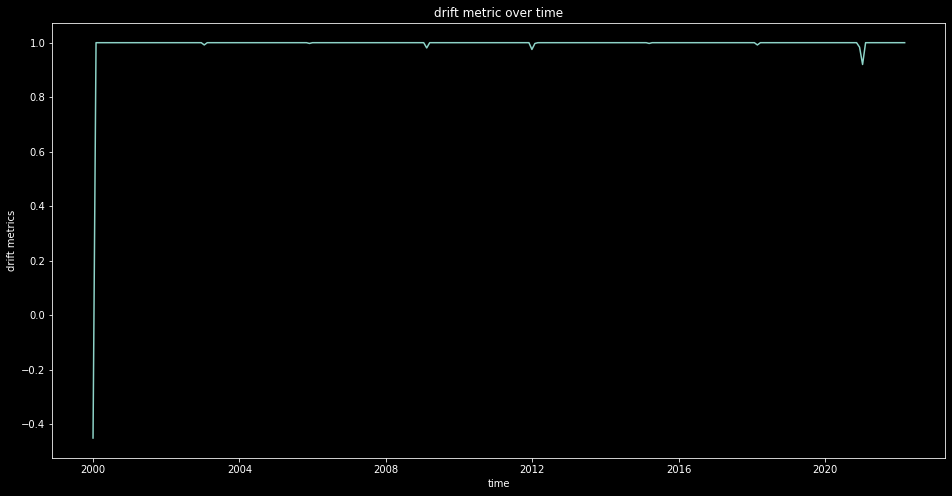

In [52]:
# automatically use first interval as baseline
results = run_and_visualize(
    df, start=datetime(2000, 1, 1), end=datetime.today()
)

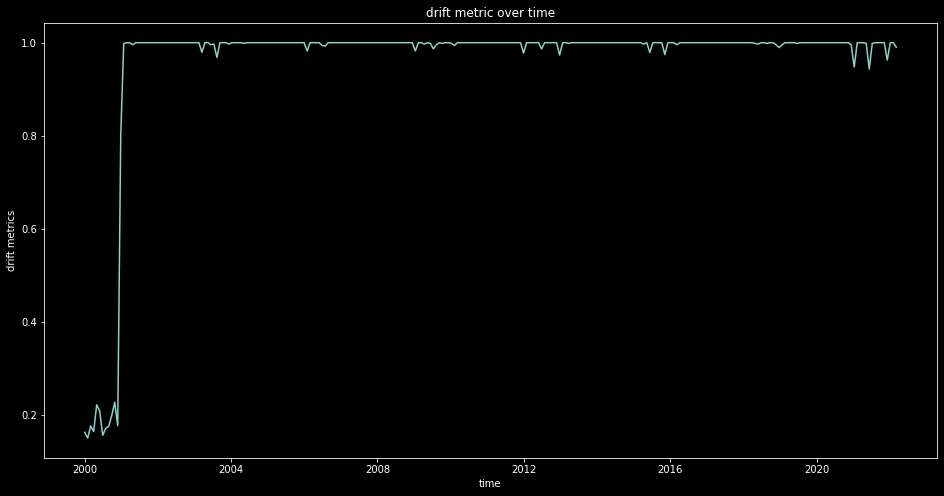

In [53]:
# explicitly set baseline
baseline = df["2000-01-01":"2001-01-01"]
results = run_and_visualize(
    df, start=datetime(2000, 1, 1), end=datetime.today(), baseline_df=baseline
)

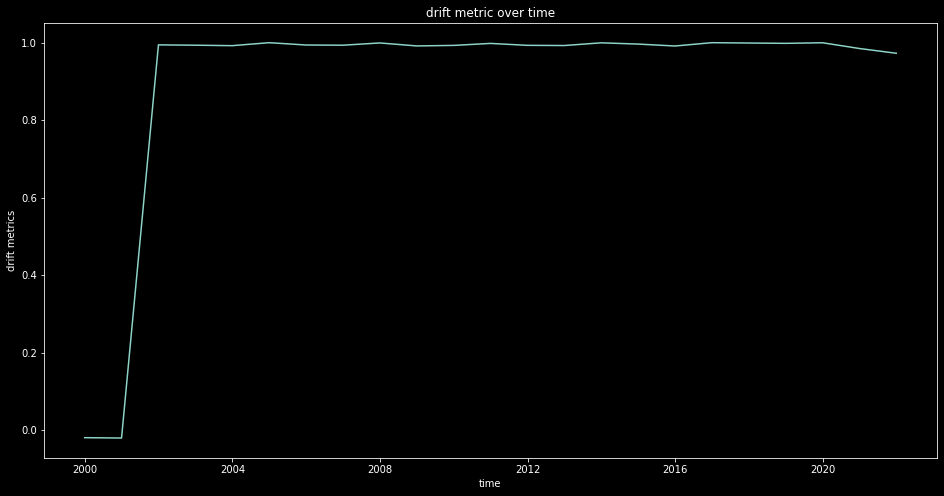

In [54]:
# explicitly set baseline and change evaluation interval
baseline = df["2000-01-01":"2002-01-01"]
results = run_and_visualize(
    df,
    start=datetime(2000, 1, 1),
    end=datetime.today(),
    baseline_df=baseline,
    interval=timedelta(days=365),
)